Importing some libraries and read datasets using pandas

In [1]:
#1) Importing some libraries and read datasets using pandas:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay 

In [2]:
df = pd.read_csv("Bank.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape

(4521, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
#checking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#check for duplicates
df.duplicated().sum()

0

Exploratory Data Analysis(EDA)

Age Distribution

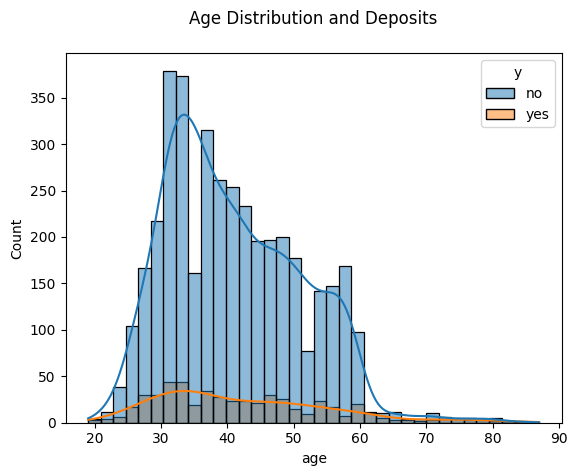

In [9]:
sns.histplot(x="age", data=df, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

Maximum clients are between the age of 30 - 40 and majority client subscribing to product or service also fall between this age groups.

Distribution of Occupation

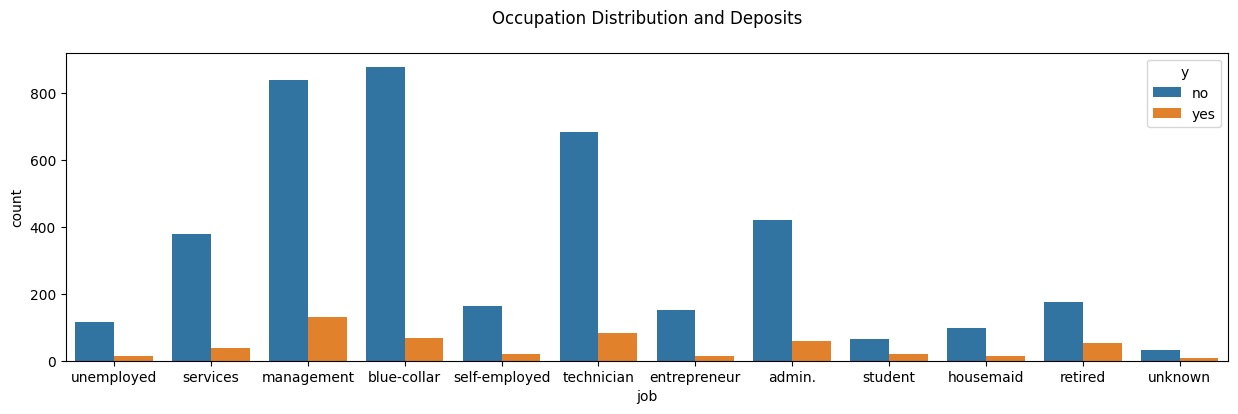

In [10]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= df, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

Majority of clients have occupation "blue-collar", "management", "technician" and maximum clients supporting purchasing of product or service are also from these occupation.

DISTRIBUTION OF MARITAL STATUS

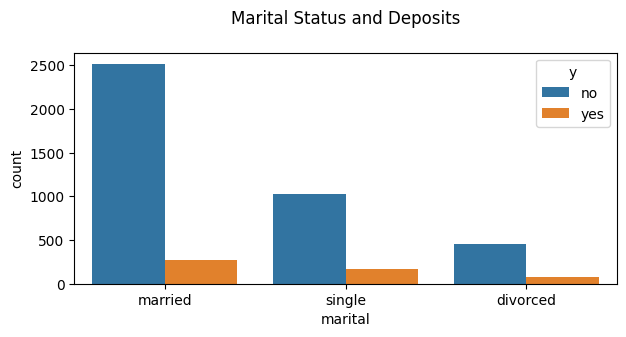

In [11]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= df, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

Maximum clients are married.

DISTRIBUTION OF EDUCATION STATUS

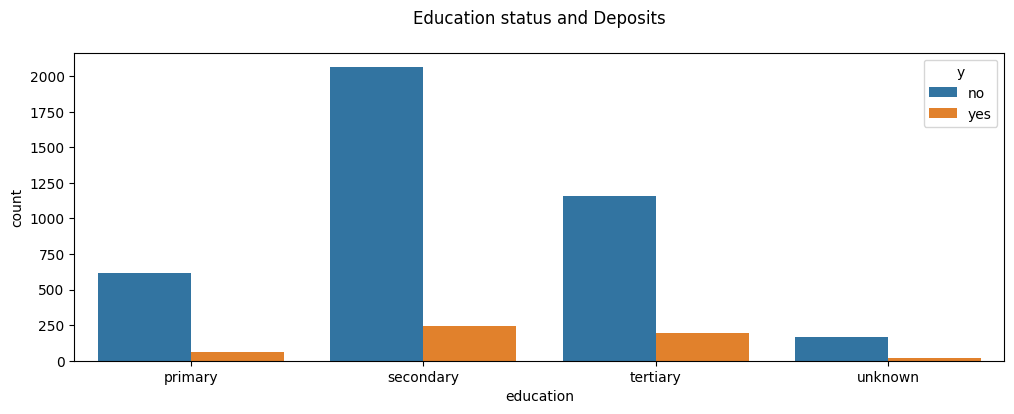

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= df, hue ="y")
plt.title("Education status and Deposits\n")
plt.show()

Maximum number of clients have completed their secondary education, with some of have done their tertiary education.

Now , we need to check if clients have credit defaults or not for further prediction

In [13]:
df.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

Majority of clients dont have credit defaults, only 76 have credit defaults.

DISTRIBUTION OF HOUSING LOAN

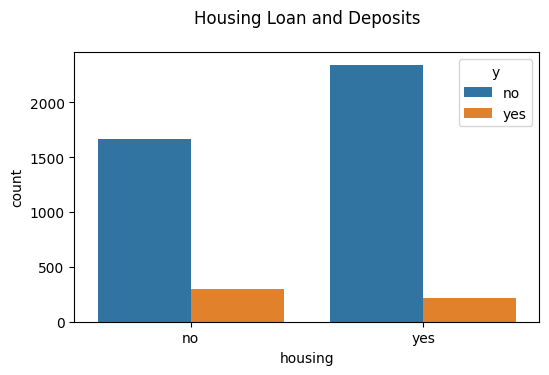

In [14]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= df, hue ="y")
plt.title("Housing Loan and Deposits\n")
plt.show()

So clients purchasing a product or service mostly have housing loan.

DISTRIBUTION OF PERSONAL LOAN

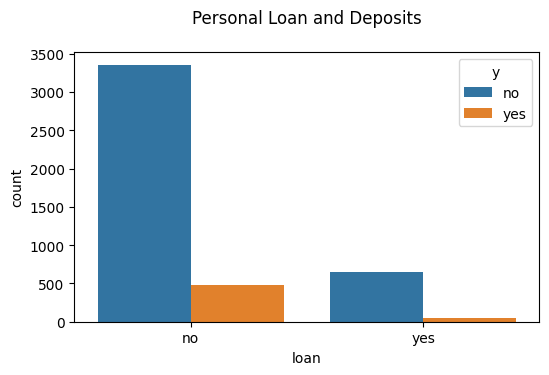

In [15]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= df, hue ="y")
plt.title("Personal Loan and Deposits\n")
plt.show()

DISTRIBUTION OF OUTCOME

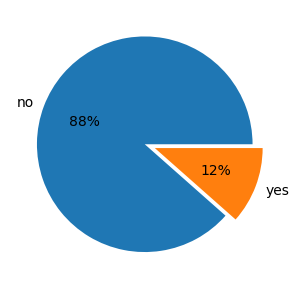

In [16]:
#Count of outcome
df.y.value_counts()
keys = df.y.value_counts().index
data = df.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data, labels=keys, explode=explode, autopct='%.0f%%')
plt.show()
        

12% of customers have purchased a product or service.

We can see dtypes of some cols is categorical, so we need to convert categorical value to numerical inputs to prepare our data for MODEL BUILDING

LABEL ENCODING CATEGORICAL FEATURES

In [17]:
cols = df.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [18]:
#Create a label Encoder instance
label_encoder = LabelEncoder()
#fit and transform the data
df[cols] = df[cols].apply(label_encoder.fit_transform)

In [19]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


CORRELATION ANALYSIS USING HEATMAP

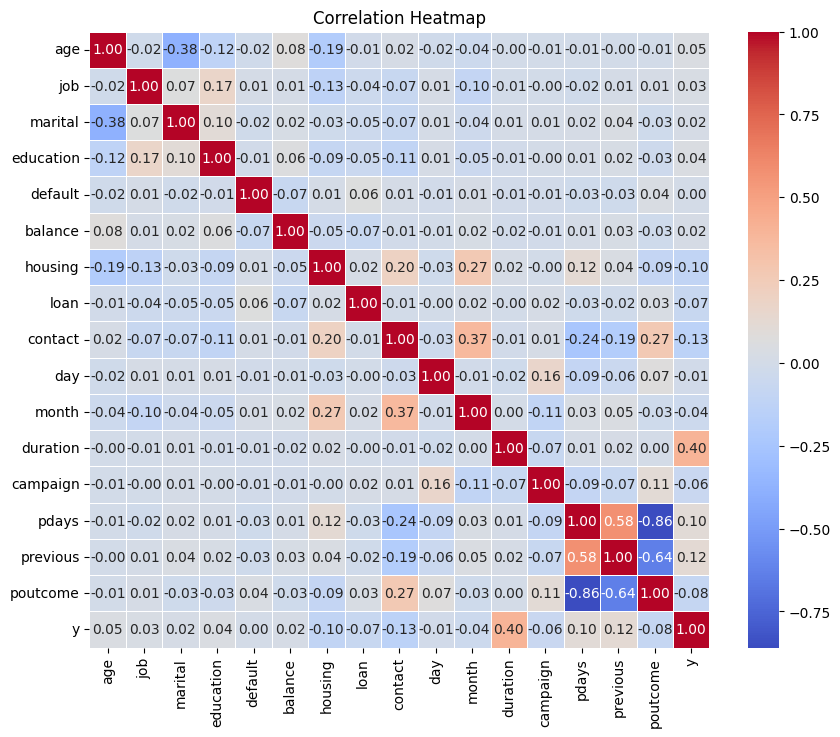

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Correlation Heatmap')
plt.show()

>>Outcome 'y' is positively correlated with duration of call and also shows slight correlation with previous attempts of call.
This implies that customer went ahead with product or service after gaining sufficient insights from bank calls and persuation.
>>Multicolinearity can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.

STANDARDIZATION: used for scaling numerical data to have zero mean and unit variance. Use it from scikit-learn library

In [27]:
#Splitting input and output
#drop the output column to get input (X)
X = df.drop("y", axis=1)
y = df.y

In [30]:
#create a StandardScalar instance
scaler = StandardScaler()
#Fit the scalar to the data and transform it
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

MODEL BUILDING - DECISION TREE CLASSIFIER

'DECISION TREE CLASSIFIER' is trained on the training set('X_train' and 'y_train'), and then predictions are made on the test set('X_test'). Finally, the accuracy and classification report are printed to evaluate the model. 

In [41]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [42]:
#Creating a Decision Tree Classifier
clf = DecisionTreeClassifier()
#Training the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
print('Train Score: {}'.format(clf.score(X_train, y_train)))  
print('Test Score: {}'.format(clf.score(X_test, y_test)))   

Train Score: 1.0
Test Score: 0.8548268238761975


In [44]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8599866018757373

In [47]:
#Making predictions on the test set
y_pred = clf.predict(X_test)

In [48]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report;\n", report)

Accuracy: 0.8548268238761975

Classification Report;
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.35      0.36      0.35       152

    accuracy                           0.85      1357
   macro avg       0.64      0.64      0.64      1357
weighted avg       0.86      0.85      0.86      1357



Accuracy of 87.85%, indicates that the model correctly predicted the target variable for approximately 87.85% of the instances in the test set. While accuracy is a common metric, its essential to consider other other metrics depending on the specific characteristics.

HYPERPARAMETER TUNING

It involves finding the best set of hyperparameters for machine learning model to improve its performance. For a Decision Tree Classifier, common hyperparameters include 'max_depth', 'min_samples_split', 'min_samples_leaf', and others.

In [54]:
#Hyperparameter tuning using scikit-learns's 'GridSearchCV:'
#Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entrophy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [3, 5, 7, 9, 10, 20]
}

In [61]:
#create the GridSearchCV object
gscv = GridSearchCV(clf, param_grid, cv=5, verbose=1)

In [62]:
#Fit the grid search to the data
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


c:\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
450 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\python\python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\python\python38\lib\site-packages\sklearn\utils\_param_valida

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20],
                         'min_samples_split': [3, 5, 7]},
             verbose=1)

In [57]:
#get the best parameters and best estimator
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 3}

In [58]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=3)

In [60]:
cross_val_score(gscv.best_estimator_, X_train, y_train, cv=5).mean()

0.8925405443237946

In [63]:
#Evaluate the best classifier on the test set
y_pred_best = gscv.best_estimator_.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [64]:
print("Best Parameters:", gscv.best_params_)
print("Best Model Accuracy:", accuracy_best)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 3}
Best Model Accuracy: 0.8960943257184967


In [65]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [66]:
print('Train Score: {}'.format(clf.score(X_train, y_train)))
print('Test Score: {}'.format(clf.score(X_test, y_test)))

Train Score: 0.9168773704171934
Test Score: 0.8916728076639646


In [67]:
pred_y = clf.predict(X_test)

#We are using confusion matrix for evaluating the performance of a classification model, particularly used for understanding the types and frequencies of errors made by the model.Key components are true positives(TP), TN, FP, FN.

<Figure size 800x600 with 0 Axes>

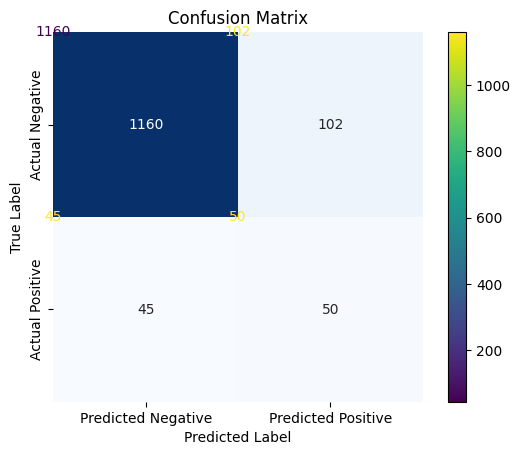

In [70]:
#Confusion matrix
conf_matrix = confusion_matrix(pred_y, y_test)
#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_).plot()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [71]:
#Classification Report
print(classification_report(pred_y, y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1262
           1       0.33      0.53      0.40        95

    accuracy                           0.89      1357
   macro avg       0.65      0.72      0.67      1357
weighted avg       0.92      0.89      0.90      1357



In [72]:
#Calculating accuracy by assuming y_test and y_pred are true labels and predicted labels, respectively
accuracy = accuracy_score(y_test, pred_y)
print("Test Accuracy score for Decision Tree Classifier:", accuracy*100) 

Test Accuracy score for Decision Tree Classifier: 89.16728076639646


In [73]:
#Cross-validation classifier is used for assessing how well a model will generalize to an independent dataset
cv_scores = cross_val_score(clf, X_test, y_test, cv=5).mean()
print("Cross-Validation Scores:", cv_scores*100)

Cross-Validation Scores: 88.35874755806381


VISUALIZATION OF TREE

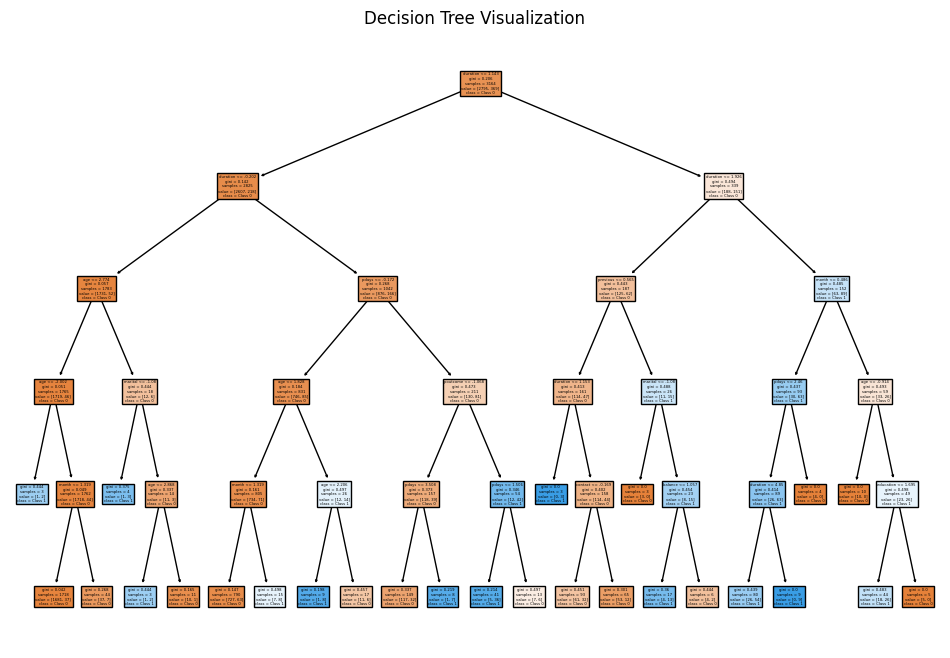

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
#here X.columns assumes that your features have columns names, the 'class_names' parameter allows you to label the classes in the plot.

CONCLUSION

In this project, we builded decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.
Dataset used is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

KEY TAKEAWAYS AND INSIGHTS: 

The process of building and evaluating a Decision Tree Classifier involves several key steps. Let's summarize:
1. Data Preparation:
   Split your dataset into features(X) and labels(y). Ensure your data is clean and suitable for training a classifier.
2. Model Training:
   Create a Decision Tree Classifier using scikit-learn's 'DecisionTreeClassifier'. Train the model on your traning dataset using the 'fit' model.
3. Hyperparameter Tuning:
   Explore different hyperparameter values using techniques like grid search('GridSearchCV') to find the optimal set.Common hyperparameters include 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'criterion'.
4. Evaluation:
   Assess model's performance using metrices such as accuracy, precision, recall, and the confusion matrix. Use accuracy_score for an overall measure of correct predictions.
5. Cross-Validation:
   Use cross-validation('cross_val_score') to get a more robust estimate of your model's performance across different subsets of your data.
6. Visualization:
   Visualize the Decision Tree structure using 'plot_tree' for an intuitive understanding of how the model makes decisions.
7. Insights and Interpretations:
   Analyze the confusion matrix to understand where the model excels and where it struggles. Consider feature importance, which can be obtained from the feature_importances_attribute of the trained model.

 

CONTINUOUS IMPROVEMENTS

Iterate on model, adjusting hyperparameters, features, or even trying different algorithms.Consider exploring more advanced techniques or ensemble methods for potentially better performance.
To further enhance predictive accuracy, exploring other machine learning algorithms or ensemble methods could be beneficial. Feature engineering and selection methods could be employed to mitigate multicollinearity. Incorporating external data sources, such as economic indicators or market trends, may provide additional insights and improve model performance.


BUSINESS RECOMENDATIONS

Based on the analysis of the Bank Marketing dataset, it is found that customers with an administration job type are the most likely to subscribe to the campaign product, while entrepreneurs are the least likely. Additionally, customers with a university degree have a higher subscription rate compared to those with a professional course or high school background. The duration of contact during the campaign shows a positive correlation with the likelihood of subscription, indicating that longer phone calls may lead to higher subscription rates. However, age does not appear to be a determining factor in the decision to subscribe. Overall, these findings provide valuable insights into customer behavior and can help guide marketing strategies for future campaigns.

Recomendations: Based on the analysis of the Bank Marketing dataset, several recommendations can be made to improve the effectiveness of future marketing campaigns.

Target Administrators and Avoid Entrepreneurs: Since customers with an administration job type have shown the highest subscription rate, it would be beneficial to focus efforts on targeting this group in future campaigns. On the other hand, the lowest subscription rate was observed among entrepreneurs, suggesting that allocating resources towards this segment may not yield significant results.

Tailor Strategies for Education Background: Customers with a university degree have demonstrated the highest subscription rate. It would be wise to create marketing messages and strategies that appeal to this educated segment. However, customers with a professional course education have shown a lower subscription rate compared to those with a high school background. Considering this, it may be necessary to fine-tune approaches to engage and persuade customers with a professional course education to increase their subscription likelihood.

Prioritize Contacting Technicians and Administrators: Although technicians have shown the longest contact duration, administrators have the highest number of subscriptions to the campaign product. It is advisable to allocate more resources towards contacting administrators and technicians as they have demonstrated a higher likelihood of subscribing.

Optimize Contact Methods: Most customers who subscribed to the product were contacted through cellular communication. However, it is important to note that this contact method also aligns with the “no” decision. This suggests the need to evaluate the effectiveness of cellular communication and explore alternative contact methods to improve subscription rates.

Timing and Frequency of Phone Calls: The highest occurrence of phone calls to customers was observed on early weekdays, specifically Monday and Tuesday, gradually decreasing towards the middle of the week. There was a significant increase on Thursday, followed by a decline on Friday, indicating a potential relationship with the approaching weekend. This information can be used to optimize the timing and frequency of phone calls, ensuring that potential customers are contacted when they are most receptive.

Emphasize Call Duration: The analysis revealed a positive correlation of 41.86% between the duration of phone calls during the campaign and the likelihood of customers subscribing to the product. It is important to encourage representatives to engage in longer conversations with potential customers, as these extended interactions have shown a higher probability of resulting in a subscription.

Consider Factors Beyond Age: The analysis did not find a clear correlation between age and the decision to subscribe through the campaign. Age alone does not appear to be a determining factor in whether someone chooses to subscribe. Therefore, it is crucial to consider other variables and characteristics when targeting potential customers, rather than relying solely on age as a predictor.

By implementing these recommendations, the marketing team can optimize their strategies, improve targeting, and increase the effectiveness of future campaigns, ultimately leading to higher subscription rates and better overall results.



PROJECT BY : SUJATA KINHEKAR